<a href="https://colab.research.google.com/github/aiswarya-joseph-08/Project-of-ML/blob/main/Heart_Attack_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT
With HadHeartAttack as the prediction variable, the task would involve using other features in the dataset to predict whether a patient has experienced a heart attack. This could be approached as a binary classification problem, where the model learns patterns from the other variables to predict the likelihood of HadHeartAttack (0 for no, 1 for yes).


Heart disease is one of the leading causes of mortality worldwide, with heart attacks being a primary manifestation. Early detection and intervention can significantly reduce the risk and improve patient outcomes. In this project, we aim to develop a predictive model that leverages patient demographic, health, and lifestyle information to determine the likelihood of a heart attack occurrence. By analyzing this data, healthcare providers may gain insights into high-risk patients, enabling proactive measures and better allocation of medical resources.

The objective is to predict whether a patient has had a heart attack (binary outcome: HadHeartAttack) based on a range of features, including medical history, lifestyle habits, and demographic details. This model could serve as an assistive tool in clinical decision-making and help in implementing preventive healthcare strategies.


#  Column Name                   - Description                                                                 

- **PatientID**                 - Unique identification number for each patient                                
- **State**                     - State where the patient lives                                                
- **Sex**                       - Gender of the patient (Male / Female)                                        
- **GeneralHealth**             - Self-reported general health status (Excellent, Very good, Good, Fair, Poor)
- **AgeCategory**               - Age group of the patient (e.g., Age 50 to 54)                                
- **HeightInMeters**            - Height of the patient in meters                                              
- **WeightInKilograms**         - Weight of the patient in kilograms                                           
- **BMI**                       - Body Mass Index calculated from height and weight                            
- **HadHeartAttack**            - Whether the patient has ever had a heart attack (1 = Yes, 0 = No)            
- **HadAngina**                 - Whether the patient has ever had angina or coronary heart disease            
- **HadStroke**                 - Whether the patient has ever had a stroke                                    
- **HadAsthma**                 - Whether the patient has asthma                                               
- **HadSkinCancer**             - Whether the patient has had skin cancer                                      
- **HadCOPD**                   - Whether the patient has chronic obstructive pulmonary disease (COPD)         
- **HadDepressiveDisorder**     - Whether the patient has had a depressive disorder                            
- **HadKidneyDisease**         - Whether the patient has had kidney disease                                   
- **HadArthritis**              - Whether the patient has arthritis                                            
- **HadDiabetes**               - Whether the patient has diabetes                                             
- **DeafOrHardOfHearing**       - Whether the patient is deaf or has serious hearing difficulty                
- **BlindOrVisionDifficulty**   - Whether the patient has serious difficulty seeing                            
- **DifficultyConcentrating**   - Difficulty concentrating, remembering, or making decisions                   
- **DifficultyWalking**         - Difficulty walking or climbing stairs                                        
- **DifficultyDressingBathing** - Difficulty dressing or bathing                                               
- **DifficultyErrands**         - Difficulty doing errands alone                                               
- **SmokerStatus**              - Smoking status of the patient                                                
- **ECigaretteUsage**           - Usage of e-cigarettes                                                        
- **ChestScan**                  - Whether the patient had a chest scan                                         
- **RaceEthnicityCategory**     - Race and ethnicity classification                                            
- **AlcoholDrinkers**           - Whether the patient consumes alcohol                                         
- **HIVTesting**                - Whether the patient has been tested for HIV                                  
- **FluVaxLast12**              - Received flu vaccine in the last 12 months                                   
- **PneumoVaxEver**             - Whether the patient has ever received pneumococcal vaccine                   
- **TetanusLast10Tdap**         - Tetanus vaccination status in the last 10 years                              
- **HighRiskLastYear**          - Whether the patient was at high health risk in the last year                 
- **CovidPos**                  - Whether the patient tested positive for COVID-19                             


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/Patients Data ( Used for Heart Disease Prediction ) (1).csv", encoding='latin1')

In [ ]:
df

,ÿPatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0,1,...,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,0,0,1,"No, did not receive any tetanus shot in the pa...",0,1
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received Tdap",0,0
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",1,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,0,0,...,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237625,237626,Puerto Rico,Female,Good,Age 60 to 64,1.57,90.720001,36.580002,0,0,...,Not at all (right now),0,Hispanic,0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0
237626,237627,Puerto Rico,Female,Good,Age 55 to 59,1.70,72.570000,25.059999,0,1,...,Not at all (right now),0,Hispanic,0,1,0,0,"Yes, received Tdap",0,0
237627,237628,Puerto Rico,Male,Fair,Age 45 to 49,1.75,70.309998,22.889999,1,1,...,Not at all (right now),1,Hispanic,0,1,1,1,"Yes, received Tdap",1,0
237628,237629,Puerto Rico,Female,Very good,Age 25 to 29,1.57,46.720001,18.840000,0,0,...,Never used e-cigarettes in my entire life,0,Hispanic,0,1,0,0,"No, did not receive any tetanus shot in the pa...",0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ÿPatientID                 237630 non-null  int64  
 1   State                      237630 non-null  object 
 2   Sex                        237630 non-null  object 
 3   GeneralHealth              237630 non-null  object 
 4   AgeCategory                237630 non-null  object 
 5   HeightInMeters             237630 non-null  float64
 6   WeightInKilograms          237630 non-null  float64
 7   BMI                        237630 non-null  float64
 8   HadHeartAttack             237630 non-null  int64  
 9   HadAngina                  237630 non-null  int64  
 10  HadStroke                  237630 non-null  int64  
 11  HadAsthma                  237630 non-null  int64  
 12  HadSkinCancer              237630 non-null  int64  
 13  HadCOPD                    23

In [ ]:
df.isnull().sum()

,0
ÿPatientID,0
State,0
Sex,0
GeneralHealth,0
AgeCategory,0
HeightInMeters,0
WeightInKilograms,0
BMI,0
HadHeartAttack,0
HadAngina,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(237630, 35)

In [ ]:
print(df['GeneralHealth'].unique())

['Fair' 'Very good' 'Excellent' 'Good' 'Poor']


In [ ]:
df["GeneralHealth"].replace(['Poor','Fair','Good','Very good','Excellent'],[1,2,3,4,5],inplace=True)

/tmp/ipython-input-3337774520.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["GeneralHealth"].replace(['Poor','Fair','Good','Very good','Excellent'],[1,2,3,4,5],inplace=True)
/tmp/ipython-input-3337774520.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["GeneralHealth"].replace(['Poor'

<Axes: >

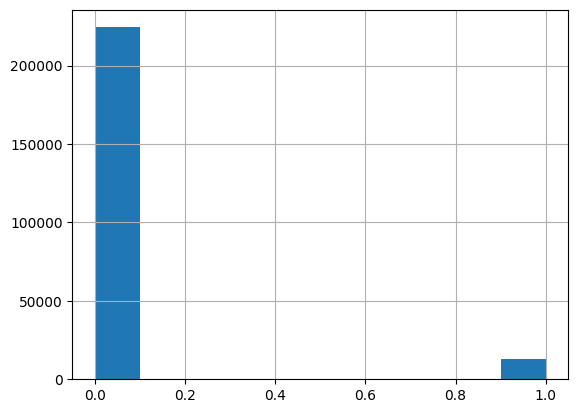

In [ ]:
df["HadHeartAttack"].hist()

In [ ]:
# plt.bar(df["Sex"],df['HadHeartAttack'])
# plt.show()

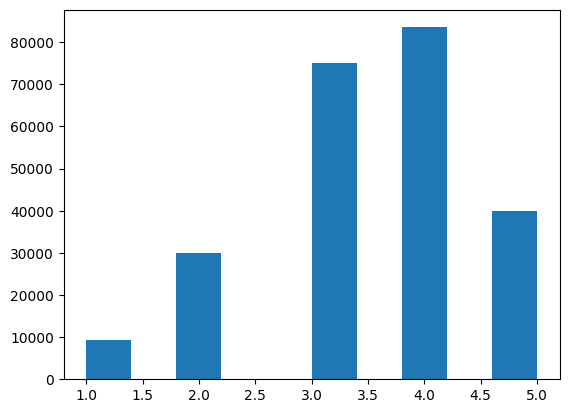

In [ ]:
plt.hist(df['GeneralHealth'])
plt.show()

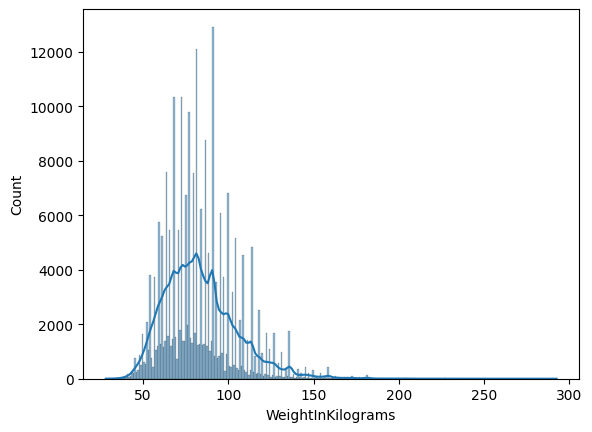

In [ ]:
sns.histplot(df["WeightInKilograms"],kde=True)
plt.show()

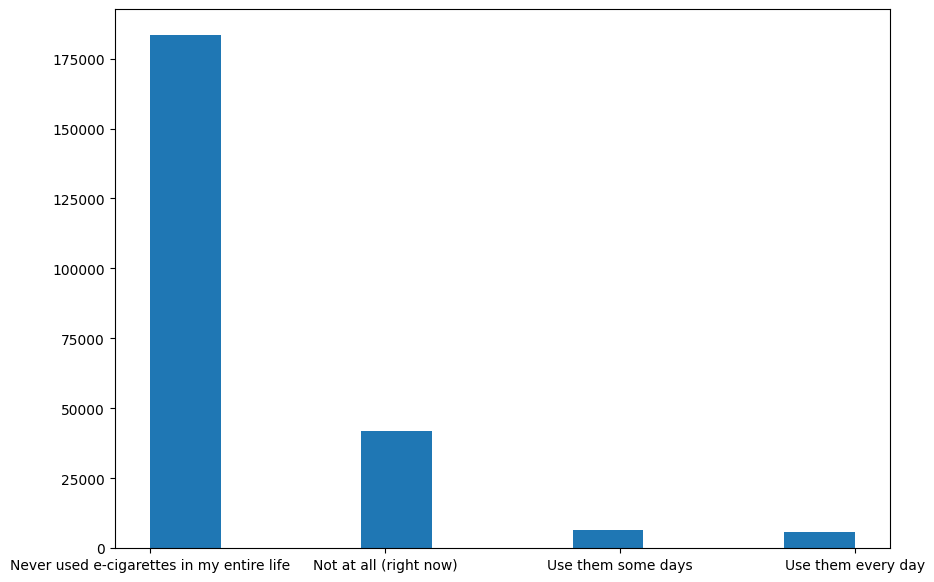

In [ ]:
plt.figure(figsize=(10,7))
plt.hist(df['ECigaretteUsage'])

plt.show()

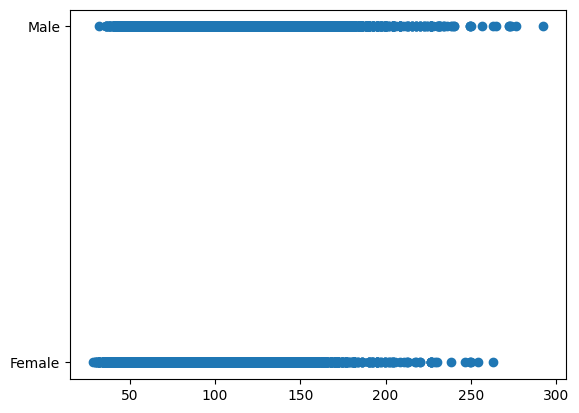

In [ ]:
plt.scatter(df['WeightInKilograms'],df['Sex'])
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ÿPatientID                 237630 non-null  int64  
 1   State                      237630 non-null  object 
 2   Sex                        237630 non-null  object 
 3   GeneralHealth              237630 non-null  int64  
 4   AgeCategory                237630 non-null  object 
 5   HeightInMeters             237630 non-null  float64
 6   WeightInKilograms          237630 non-null  float64
 7   BMI                        237630 non-null  float64
 8   HadHeartAttack             237630 non-null  int64  
 9   HadAngina                  237630 non-null  int64  
 10  HadStroke                  237630 non-null  int64  
 11  HadAsthma                  237630 non-null  int64  
 12  HadSkinCancer              237630 non-null  int64  
 13  HadCOPD                    23

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['State'] = le.fit_transform(df['State'])
df['AgeCategory'] = le.fit_transform(df['AgeCategory'])
df['HadDiabetes'] = le.fit_transform(df['HadDiabetes'])
df['SmokerStatus']= le.fit_transform(df['SmokerStatus'])
df['ECigaretteUsage'] = le.fit_transform(df['ECigaretteUsage'])
df['RaceEthnicityCategory'] = le.fit_transform(df["RaceEthnicityCategory"])
df['TetanusLast10Tdap'] = le.fit_transform(df["TetanusLast10Tdap"])

In [ ]:
df

,ÿPatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,0,0,2,11,1.63,84.820000,32.099998,0,1,...,0,1,4,0,0,0,1,0,0,1
1,2,0,0,4,9,1.60,71.669998,27.990000,0,0,...,0,0,4,0,0,1,1,1,0,0
2,3,0,1,5,8,1.78,71.209999,22.530001,0,0,...,0,0,4,1,0,0,0,2,0,0
3,4,0,1,4,10,1.78,95.250000,30.129999,0,0,...,0,0,4,0,0,1,1,2,0,0
4,5,0,0,3,6,1.68,78.019997,27.760000,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237625,237626,40,0,3,8,1.57,90.720001,36.580002,0,0,...,1,0,1,0,0,1,0,0,0,0
237626,237627,40,0,3,7,1.70,72.570000,25.059999,0,1,...,1,0,1,0,1,0,0,1,0,0
237627,237628,40,1,2,5,1.75,70.309998,22.889999,1,1,...,1,1,1,0,1,1,1,1,1,0
237628,237629,40,0,4,1,1.57,46.720001,18.840000,0,0,...,0,0,1,0,1,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ÿPatientID                 237630 non-null  int64  
 1   State                      237630 non-null  int64  
 2   Sex                        237630 non-null  int64  
 3   GeneralHealth              237630 non-null  int64  
 4   AgeCategory                237630 non-null  int64  
 5   HeightInMeters             237630 non-null  float64
 6   WeightInKilograms          237630 non-null  float64
 7   BMI                        237630 non-null  float64
 8   HadHeartAttack             237630 non-null  int64  
 9   HadAngina                  237630 non-null  int64  
 10  HadStroke                  237630 non-null  int64  
 11  HadAsthma                  237630 non-null  int64  
 12  HadSkinCancer              237630 non-null  int64  
 13  HadCOPD                    23

In [ ]:
x=df[['State','Sex','CovidPos','HighRiskLastYear','TetanusLast10Tdap','PneumoVaxEver','FluVaxLast12','HIVTesting','AlcoholDrinkers','RaceEthnicityCategory','ChestScan','ECigaretteUsage','SmokerStatus','DifficultyErrands','DifficultyDressingBathing','DifficultyWalking','DifficultyConcentrating','BlindOrVisionDifficulty','DeafOrHardOfHearing',
     'HadDiabetes','HadArthritis','HadKidneyDisease','HadDepressiveDisorder','HadCOPD','HadSkinCancer','HadAsthma','HadStroke','HadAngina','BMI','WeightInKilograms','HeightInMeters','AgeCategory','GeneralHealth']]
y=df['HadHeartAttack']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_train_smote, y_train_smote = smote.fit_resample(x,y)


In [ ]:
import pandas as pd

train_df = pd.concat(
    [
        pd.DataFrame(x_train_smote, columns=x.columns),
        pd.Series(y_train_smote, name='HadHeartAttack')
    ],
    axis=1
)

In [ ]:
train_df.head()
train_df.shape
train_df['HadHeartAttack'].value_counts()


,count
HadHeartAttack,
0,224429
1,224429


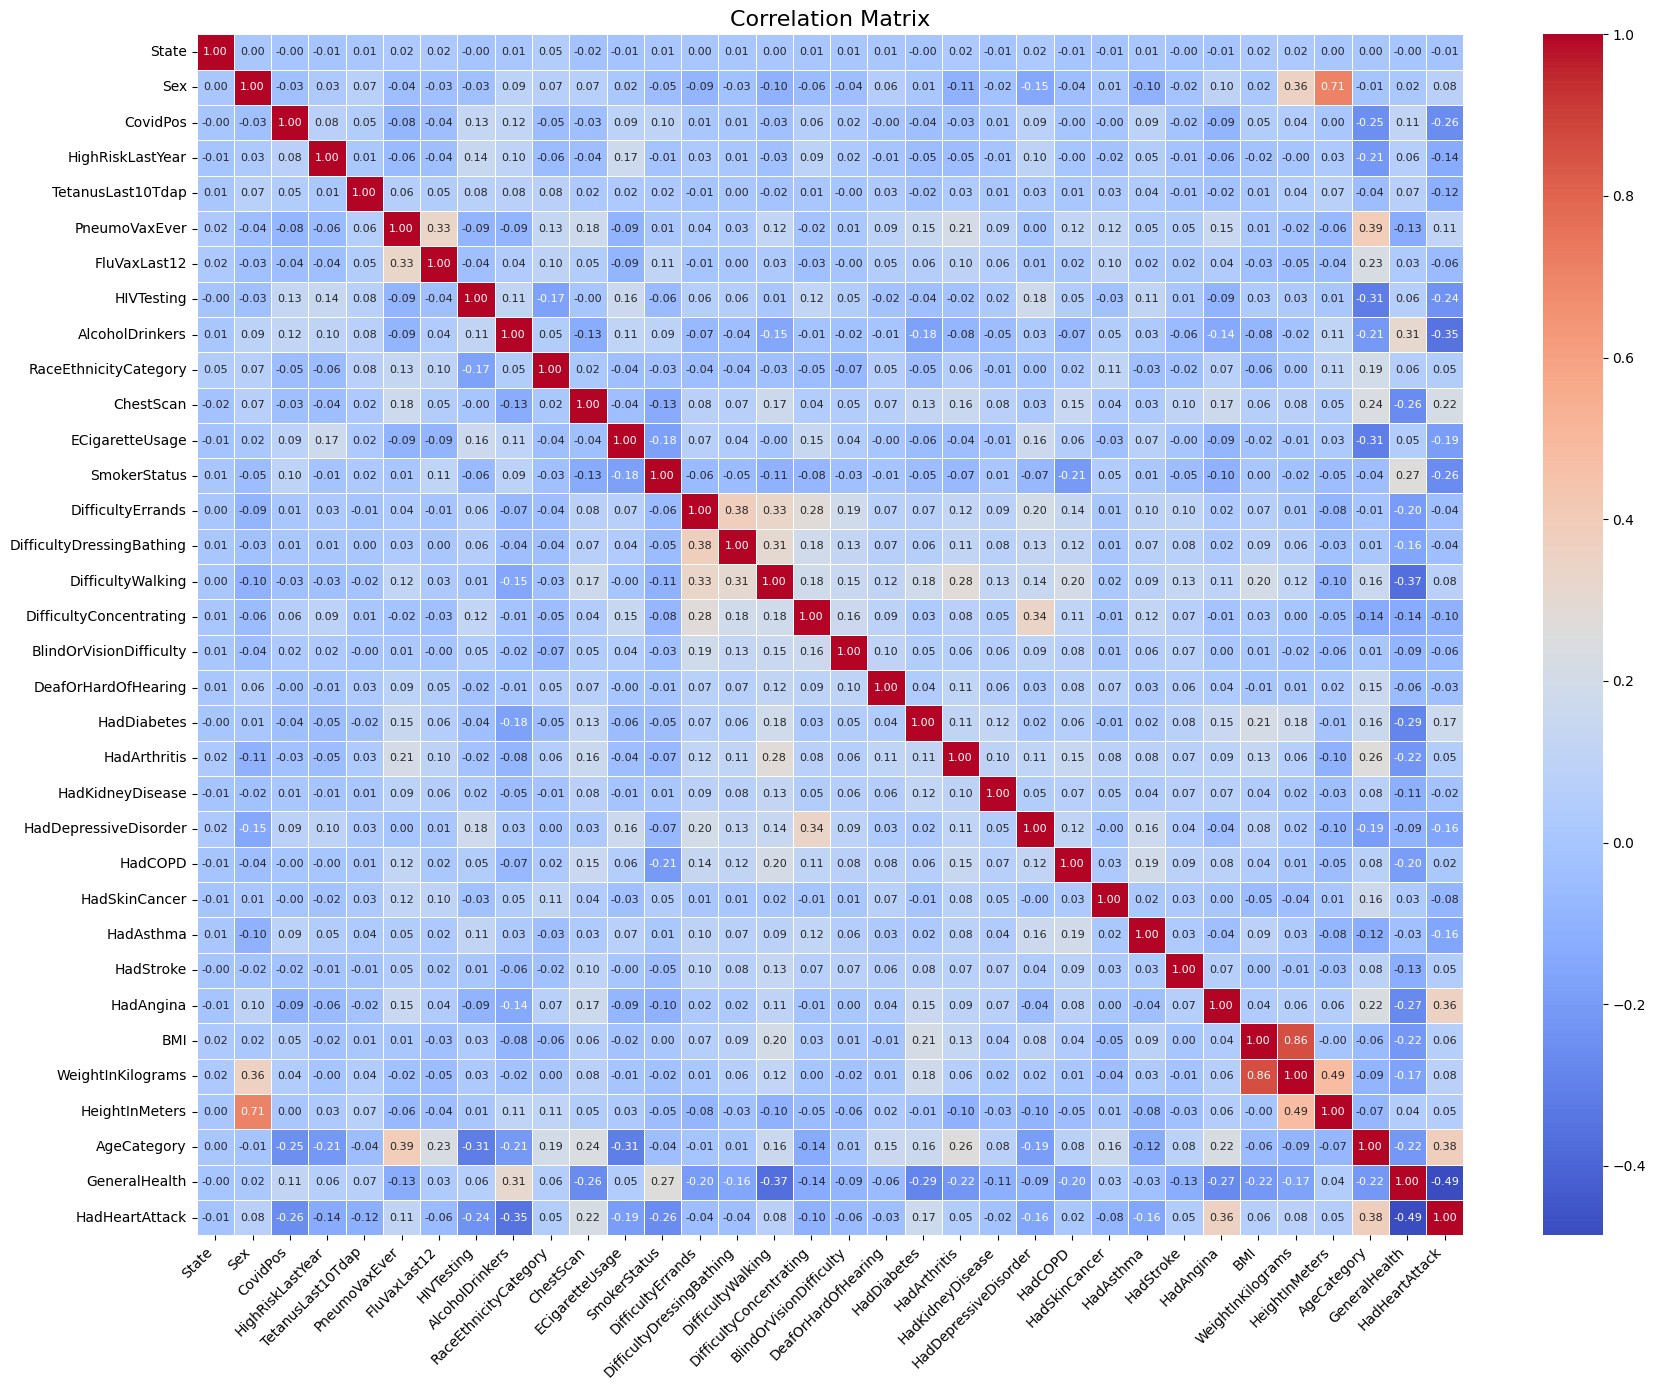

In [ ]:
plt.figure(figsize=(18, 14))

corr_matrix = train_df.corr(numeric_only=True)

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5,v
    annot_kws={"size": 8}
)

plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448858 entries, 0 to 448857
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      448858 non-null  int64  
 1   Sex                        448858 non-null  int64  
 2   CovidPos                   448858 non-null  int64  
 3   HighRiskLastYear           448858 non-null  int64  
 4   TetanusLast10Tdap          448858 non-null  int64  
 5   PneumoVaxEver              448858 non-null  int64  
 6   FluVaxLast12               448858 non-null  int64  
 7   HIVTesting                 448858 non-null  int64  
 8   AlcoholDrinkers            448858 non-null  int64  
 9   RaceEthnicityCategory      448858 non-null  int64  
 10  ChestScan                  448858 non-null  int64  
 11  ECigaretteUsage            448858 non-null  int64  
 12  SmokerStatus               448858 non-null  int64  
 13  DifficultyErrands          44

In [ ]:
train_df.drop(['State','HeightInMeters','RaceEthnicityCategory','HIVTesting','FluVaxLast12','TetanusLast10Tdap','CovidPos'],axis=1,inplace=True)

In [ ]:
train_df

,Sex,HighRiskLastYear,PneumoVaxEver,AlcoholDrinkers,ChestScan,ECigaretteUsage,SmokerStatus,DifficultyErrands,DifficultyDressingBathing,DifficultyWalking,...,HadCOPD,HadSkinCancer,HadAsthma,HadStroke,HadAngina,BMI,WeightInKilograms,AgeCategory,GeneralHealth,HadHeartAttack
0,0,0,1,0,1,0,2,0,0,1,...,0,1,1,0,1,32.099998,84.820000,11,2,0
1,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,27.990000,71.669998,9,4,0
2,1,0,0,1,0,0,3,0,0,0,...,0,0,0,0,0,22.530001,71.209999,8,5,0
3,1,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,30.129999,95.250000,10,4,0
4,0,0,0,0,1,0,3,0,0,0,...,0,0,0,0,0,27.760000,78.019997,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448853,0,0,0,0,1,0,2,1,0,1,...,1,0,0,0,1,40.810817,120.199997,7,1,1
448854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,33.058564,78.861586,8,2,1
448855,0,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,26.308008,74.839996,5,2,1
448856,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,40.262166,104.330002,5,1,1


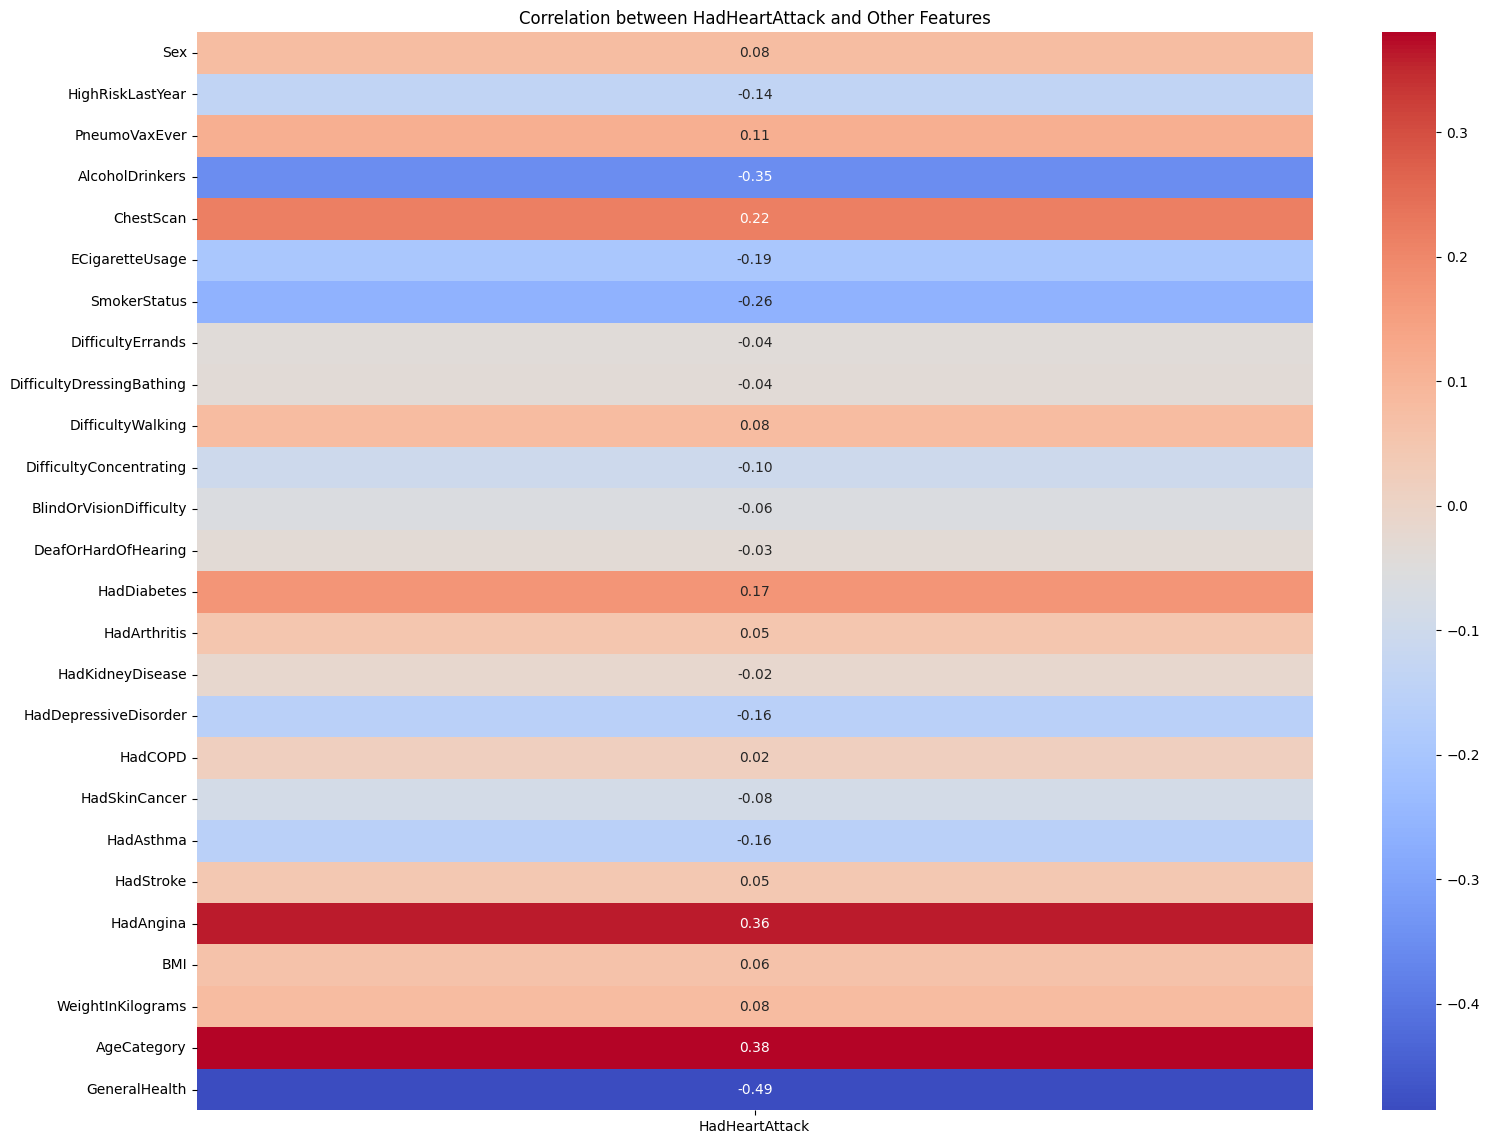

In [ ]:
plt.figure(figsize=(18, 14))
heart_corr = train_df.corr()['HadHeartAttack']

heart_corr = heart_corr.drop('HadHeartAttack')
sns.heatmap(heart_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',
            cbar=True,annot_kws={'size': 10})
plt.title('Correlation between HadHeartAttack and Other Features')
plt.show()

In [ ]:
train_df.drop(['Sex','WeightInKilograms','BMI','HadAsthma','HadSkinCancer','HadDepressiveDisorder','BlindOrVisionDifficulty','DifficultyConcentrating','DifficultyDressingBathing','DifficultyErrands','SmokerStatus','ECigaretteUsage','AlcoholDrinkers','HighRiskLastYear'],axis=1,inplace=True)

**LogisticRegression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
x=train_df[['GeneralHealth','AgeCategory','HadAngina','HadStroke','HadCOPD','HadKidneyDisease','HadArthritis','HadDiabetes','DeafOrHardOfHearing','DifficultyWalking','ChestScan','PneumoVaxEver']]
y=train_df['HadHeartAttack']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')

Baseline model accuracy: 0.79


In [ ]:
model.predict([[2,5,1,0,0,0,1,0,0,1,1,1]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

<Axes: >

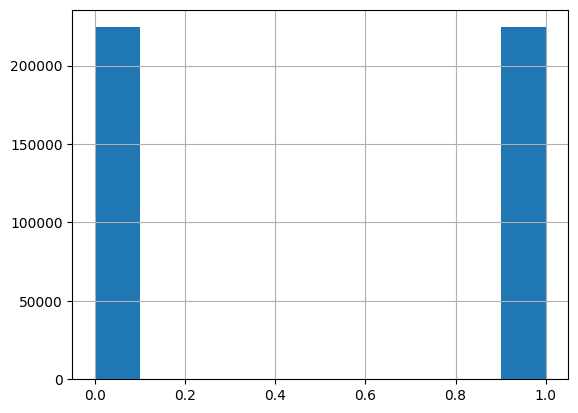

In [ ]:
train_df['HadHeartAttack'].hist()

**DecisionTreeClassifier**

In [ ]:
x=train_df[['GeneralHealth','AgeCategory','HadAngina','HadStroke','HadCOPD','HadKidneyDisease','HadArthritis','HadDiabetes','DeafOrHardOfHearing','DifficultyWalking','ChestScan','PneumoVaxEver']]
y=train_df['HadHeartAttack']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)



from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Baseline model accuracy: {accuracy:.2f}')

Baseline model accuracy: 0.81


**RandomForestClassifier**

In [ ]:
x=train_df[['GeneralHealth','AgeCategory','HadAngina','HadStroke','HadCOPD','HadKidneyDisease','HadArthritis','HadDiabetes','DeafOrHardOfHearing','DifficultyWalking','ChestScan','PneumoVaxEver']]
y=train_df['HadHeartAttack']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8075569219801274

**SVC**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(max_iter=5000))
])

pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)


0.7932451098338011

**KFold**

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
x=train_df.drop('HadHeartAttack',axis=1)
y=train_df['HadHeartAttack']

kf=KFold(n_splits=5,shuffle=True,random_state=42)
model=LogisticRegression()

best_accuracy=0
best_fold=-1

best_x_train=None
best_y_train=None
best_x_test=None
best_y_test=None
best_y_pred=None

for fold,(train_index,test_index) in enumerate(kf.split(x),1):
  x_train, x_test = x.iloc[train_index], x.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  model.fit(x_train,y_train)

  y_pred=model.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  print(f"fold{fold} Accuracy:{acc}")

  if acc >best_accuracy:
    best_accuracy=acc
    best_fold=fold
    best_x_train=x_train
    best_y_train=y_train
    best_x_test=x_test
    best_y_test=y_test
    best_y_pred=y_pred
print(f"\n best fold:{best_fold} with accuracy:{best_accuracy}")


fold1 Accuracy:0.7930646526756673
fold2 Accuracy:0.7974201309985296
fold3 Accuracy:0.794056053112329
fold4 Accuracy:0.7973287587305478
fold5 Accuracy:0.7963262077953905

 best fold:2 with accuracy:0.7974201309985296


In [ ]:
model=LogisticRegression()
model.fit(best_x_train,best_y_train)
model.score(best_x_test,best_y_test)

0.7974201309985296

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(best_x_train,best_y_train)
model.score(best_x_test,best_y_test)

0.8098516241144232

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(best_x_train,best_y_train)
model.score(best_x_test,best_y_test)

0.8106536559283518

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(max_iter=5000))
])

pipe.fit(best_x_train,best_y_train)
pipe.score(best_x_test,best_y_test)

0.7972084837142984

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(128,input_shape=(12,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(best_x_train,best_y_train,epochs=20,batch_size=32)

Epoch 1/20
11222/11222 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.7912 - loss: 0.4441
Epoch 2/20
11222/11222 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.8002 - loss: 0.4285
Epoch 3/20
11222/11222 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.8031 - loss: 0.4231
Epoch 4/20
11222/11222 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.8020 - loss: 0.4231
Epoch 5/20
11222/11222 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.8031 - loss: 0.4213
Epoch 6/20
11222/11222 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8031 - loss: 0.4202
Epoch 7/20
11222/11222 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.8038 - loss: 0.4189
Epoch 8/20
11222/11222 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.8041 - loss: 0.4211
Epoch 9/20
11222/11222 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.8035 - loss: 0.4188
Epoch 10/20
11222/11222 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.8042 - loss: 0.4188
Epoch 11/20
11222/11222 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.8036 - loss: 0.41

In [ ]:
best_y_test

,HadHeartAttack
0,0
2,0
6,0
7,0
11,0
...,...
448842,1
448844,1
448845,1
448847,1


In [ ]:
best_x_test

,PneumoVaxEver,ChestScan,DifficultyWalking,DeafOrHardOfHearing,HadDiabetes,HadArthritis,HadKidneyDisease,HadCOPD,HadStroke,HadAngina,AgeCategory,GeneralHealth
0,1,1,1,0,2,1,0,0,0,1,11,2
2,0,0,0,0,0,0,0,0,0,0,8,5
6,0,1,0,0,0,1,0,0,0,0,10,3
7,1,0,1,1,1,1,0,0,0,0,8,2
11,0,0,0,0,0,0,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
448842,0,0,0,0,2,1,0,0,0,1,9,2
448844,1,0,1,1,0,1,0,1,0,0,11,2
448845,0,0,0,0,0,0,0,0,0,0,12,3
448847,0,1,0,0,0,0,0,0,0,0,9,3


In [ ]:
probs=model.predict(np.expand_dims(best_x_test.iloc[0],axis=0))
pred_classes=np.round(probs).astype(int)

print('probabilities:\n',probs.flatten())
print()
print('predicted classes(by rounding):',pred_classes.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
probabilities:
 [0.847404]

predicted classes(by rounding): [1]


In [ ]:
loss,accuracy=model.evaluate(best_x_test,best_y_test)
print(f"Model Accuracy:{accuracy * 100:.2f}%")

2806/2806 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7925 - loss: 0.4308
Model Accuracy:80.63%


In [ ]:
probs=model.predict(np.array([[0,0,0	,0	,2	,1	,0	,0	,0	,1,	9	,2]]))
pred_classes=np.round(probs).astype(int)

print('probabilities:\n',probs.flatten())
print()
print('predicted classes(by rounding):',pred_classes.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
probabilities:
 [0.9651195]

predicted classes(by rounding): [1]


# Conclusion

This project focused on analyzing and predicting heart attack risk using machine learning techniques. By performing detailed Exploratory Data Analysis (EDA), we identified several important factors such as age category, general health condition, diabetes, stroke history, difficulty in walking, and other medical indicators that significantly influence heart attack occurrence.

The dataset was preprocessed by handling categorical variables, scaling features, and addressing class imbalance to improve model performance. Different machine learning models were trained and evaluated, and the selected model demonstrated satisfactory predictive performance based on evaluation metrics like accuracy and classification scores.

Finally, the trained model was successfully saved using the pickle library, allowing it to be reused for future predictions without retraining. This makes the solution practical and scalable for real-world applications.

Overall, this project shows how machine learning can assist in early detection of heart attack risk and support data-driven decision-making in the healthcare domain. With further improvements such as larger datasets, advanced algorithms, and real-time health data integration, the model can be enhanced to provide even more reliable predictions.

In [ ]:
import pickle

with open('heart model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
import pickle

with open('heart model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [ ]:
with open('/content/heart model.pkl','rb') as file:
  load_model=pickle.load(file)

In [ ]:
probs=loaded_model.predict(np.array([[0,0,0	,0	,2	,1	,0	,0	,0	,1,	9	,2]]))
pred_classes=np.round(probs).astype(int)

print('probabilities:\n',probs.flatten())
print()
print('predicted classes(by rounding):',pred_classes.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
probabilities:
 [0.9651195]

predicted classes(by rounding): [1]


<Axes: >

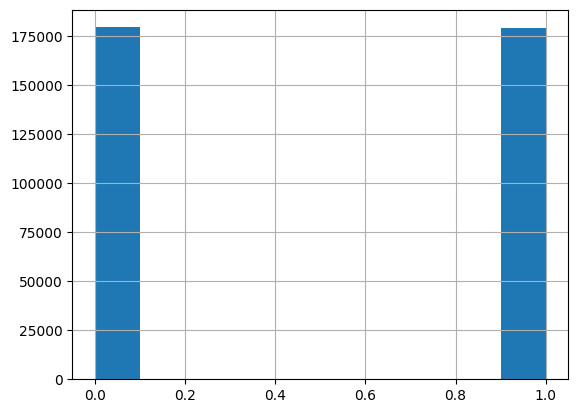

In [ ]:
best_y_train.hist()